# Introducción a la ciencia de datos con Python
### Rafa Caballero

##  Preprocesado

Veamos cómo se pueden utilizar las características de Pandas para preprocesado básico de los datos



### Índice
[Duplicados](#Duplicados)<br>
[Ver nulos](#Ver-nulos)<br>
[Eliminar nulos](#Eliminar-nulos)<br>
[Tranformación de valores](#Tranformación-de-valores)<br>
[Normalización y estandarización](#normalizacion)<br>


<a name="Duplicados"></a>
### Duplicados

A menudo nos interesaría eliminar datos duplicados ya sean filas o columnas que pueden influir negativamente en nuestros resultados.

In [1]:
import pandas as pd

data = pd.DataFrame({'k1': ['a'] * 3 + ['b'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,a,1
1,a,1
2,a,2
3,b,3
4,b,3
5,b,4
6,b,4


El método `duplicated` devuelve una serie de booleanos que indican si la fila correspondiente está duplicada

In [2]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

Vemos que tiene toda la apariencia de un filtro; ahora es fácil eliminar duplicados

In [3]:
data[~data.duplicated()]

,k1,k2
0,a,1
2,a,2
3,b,3
5,b,4


Otra forma de hacerlo

In [4]:
data.drop_duplicates()

,k1,k2
0,a,1
2,a,2
3,b,3
5,b,4


Se puede limitar el borrado a ciertas columnas

In [5]:
data['v1'] = range(7)
data

,k1,k2,v1
0,a,1,0
1,a,1,1
2,a,2,2
3,b,3,3
4,b,3,4
5,b,4,5
6,b,4,6


In [6]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,a,1,0
3,b,3,3


<a name="Ver-nulos"></a>
### Ver nulos

Lo primero que hay que indicar es que en general los valores NaN/missing/nulos no son un problema para Pandas, la mayoría de las características los soportan sin problemas.

Sin embargo, en la librería de machine learning `sklearn` sí puede dar error, por lo que puede que queramos eliminarlos.

Empezamos creando un ejemplo:

In [7]:
import pandas as pd
import numpy as np
datos= [
    [601166, 20111231,  601166,  np.nan,   np.nan, np.nan],
    [600036, 20111231,  600036,  np.nan,    12, np.nan],
    [600016, 20111231,  600016,  4.3,   np.nan, np.nan],
    [601009, 20111231,  601009,  np.nan,   np.nan, np.nan],
    [601939, 20111231,  601939,  2.5,  8],
    [100001, 20111231,  100001,  np.nan,   np.nan, np.nan],
    [np.nan, np.nan,  np.nan,  np.nan,   np.nan, np.nan]

]

df = pd.DataFrame(datos,columns=['A','B','C','D','E','F'])
df

,A,B,C,D,E,F
0,601166.0,20111231.0,601166.0,NaN,NaN,NaN
1,600036.0,20111231.0,600036.0,NaN,12.0,NaN
2,600016.0,20111231.0,600016.0,4.3,NaN,NaN
3,601009.0,20111231.0,601009.0,NaN,NaN,NaN
4,601939.0,20111231.0,601939.0,2.5,8.0,NaN
5,100001.0,20111231.0,100001.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN


Lo primero sería contar el número de nulos por columna

In [14]:
df.isnull()

,A,B,C,D,E,F
0,False,False,False,True,True,True
1,False,False,False,True,False,True
2,False,False,False,False,True,True
3,False,False,False,True,True,True
4,False,False,False,False,False,True
5,False,False,False,True,True,True
6,True,True,True,True,True,True


In [15]:
df.A.isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
Name: A, dtype: bool

In [8]:
df.isnull().sum()

A    1
B    1
C    1
D    5
E    5
F    7
dtype: int64

**Ejercicio 1** ¿Cómo contar el total de nulos?

También podemos verlo por filas con

In [9]:
df.isna().sum(axis=1) # axis =1 número de columnas nulas en cada fila

0    3
1    2
2    2
3    3
4    1
5    3
6    6
dtype: int64

Filas con algún nulo

In [10]:
(df.isna().sum() > 0).sum()

np.int64(6)

Columnas con algún nulo

In [11]:
(df.isna().sum(axis=1) > 0).sum()

np.int64(7)


Sobre todo en el caso de dataframes con gran cantidad de datos utilizar una visualización adecuada puede ayudar a entender el origen de los nulos. La biblioteca missingno puede ser muy útil en este sentido

In [ ]:
#!pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:

import pandas as pd
import missingno as msno


url="https://github.com/RafaelCaballero/tdm/blob/master/datos/tusa2020.csv?raw=true"
df = pd.read_csv(url)
df

,_id,text,userid,screen_name,created_at,lang,quote_count,reply_count,retweet_count,favorite_count,coordinates,reply,quote,RT,RT_source,nRTin
0,1322162444786126848,Winners attract other winners,289706821,thatguy0603,2020-10-30T13:04:26.000Z,en,0.0,0.0,0.0,0.0,NaN,False,True,False,NaN,0.0
1,1316829358686834688,NOW WE KNOW...C-SPAN Steve Sculley tried to ri...,1116507977828175872,FloridaDude297,2020-10-15T19:52:39.000Z,en,12.0,28.0,681.0,1232.0,NaN,False,False,False,NaN,0.0
2,1318888111699599362,NaN,1290009888580657152,why_inn,2020-10-21T12:13:24.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.318884e+18,NaN
3,1321483993922023424,@realDonaldTrump Vote Biden🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊🌊,922851359594033152,Janet06969062,2020-10-28T16:08:30.000Z,fr,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,0.0
4,1313626566694404096,NaN,3285934814,Bill4TruthTrump,2020-10-06T23:45:54.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.313618e+18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,1315812986049576961,Anderson Cooper’s face when he hears they are ...,27950593,BookofJonah,2020-10-13T00:33:57.000Z,en,0.0,0.0,0.0,0.0,NaN,False,False,False,NaN,11248.0
8219,1316458442303967232,@Annakhait @GeorgePaschall @JoeBiden Find the ...,1074690010266386437,Skeye_Watching,2020-10-14T19:18:45.000Z,en,0.0,0.0,2.0,3.0,NaN,True,False,False,NaN,1.0
8220,1322185176261296132,Should we have a law that would severely punis...,1290693635441332230,noname76089779,2020-10-30T14:34:45.000Z,en,2.0,5.0,11.0,8.0,NaN,False,False,False,NaN,43.0
8221,1319049364753481728,@MilesTaylorUSA @JoeBiden https://t.co/JXZEHDjG5P,493606253,LocolopezNYC,2020-10-21T22:54:09.000Z,und,0.0,0.0,0.0,0.0,NaN,True,False,False,NaN,12.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             8223 non-null   int64  
 1   text            4126 non-null   object 
 2   userid          8223 non-null   int64  
 3   screen_name     8223 non-null   object 
 4   created_at      8223 non-null   object 
 5   lang            4126 non-null   object 
 6   quote_count     4126 non-null   float64
 7   reply_count     4126 non-null   float64
 8   retweet_count   4126 non-null   float64
 9   favorite_count  4126 non-null   float64
 10  coordinates     0 non-null      float64
 11  reply           4126 non-null   object 
 12  quote           4110 non-null   object 
 13  RT              8223 non-null   bool   
 14  RT_source       4097 non-null   float64
 15  nRTin           4126 non-null   float64
dtypes: bool(1), float64(7), int64(2), object(6)
memory usage: 971.8+ KB


Vemos que `coordinates`solo tiene nulos; podemos quitarla directamente

In [19]:
df2 = df.drop(columns=["coordinates"])

Un "histograma de nulos":

<Axes: >

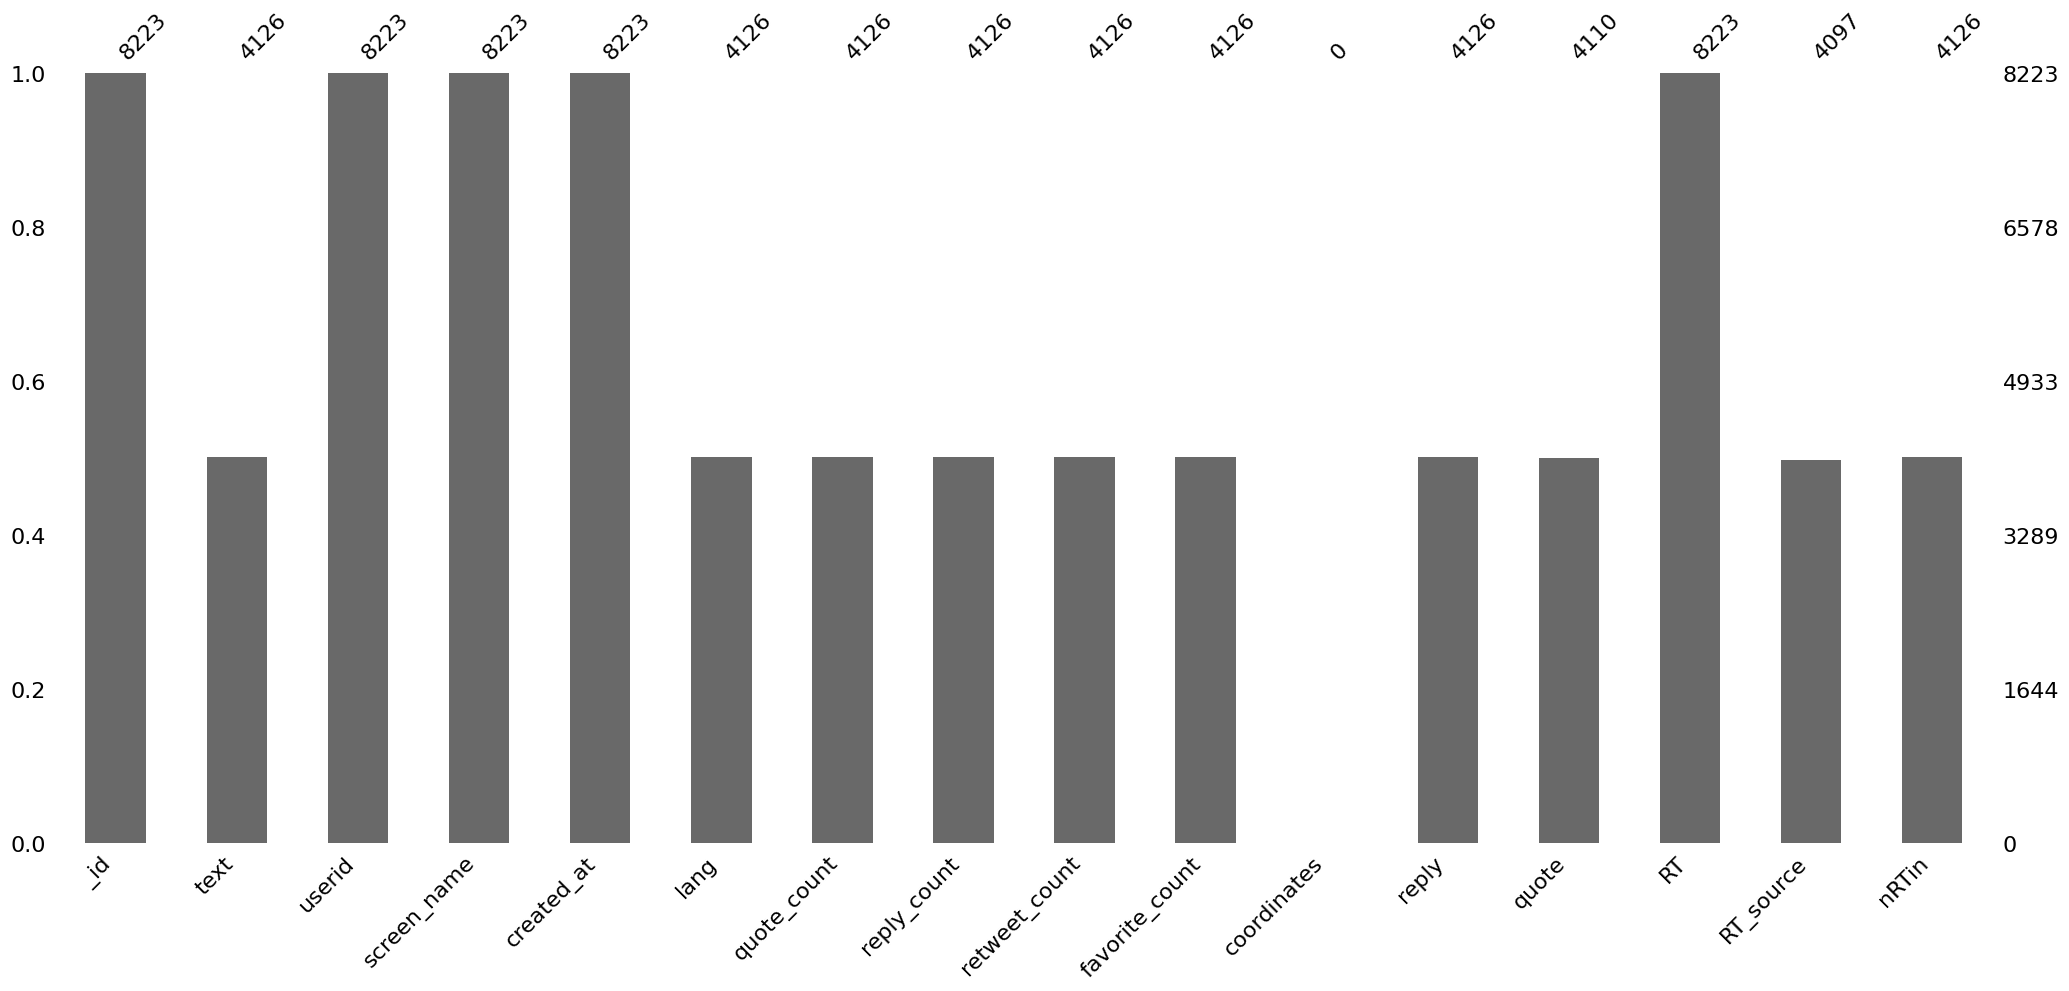

In [20]:
msno.bar(df)

Otra forma, que puede resultar más informativa

<Axes: >

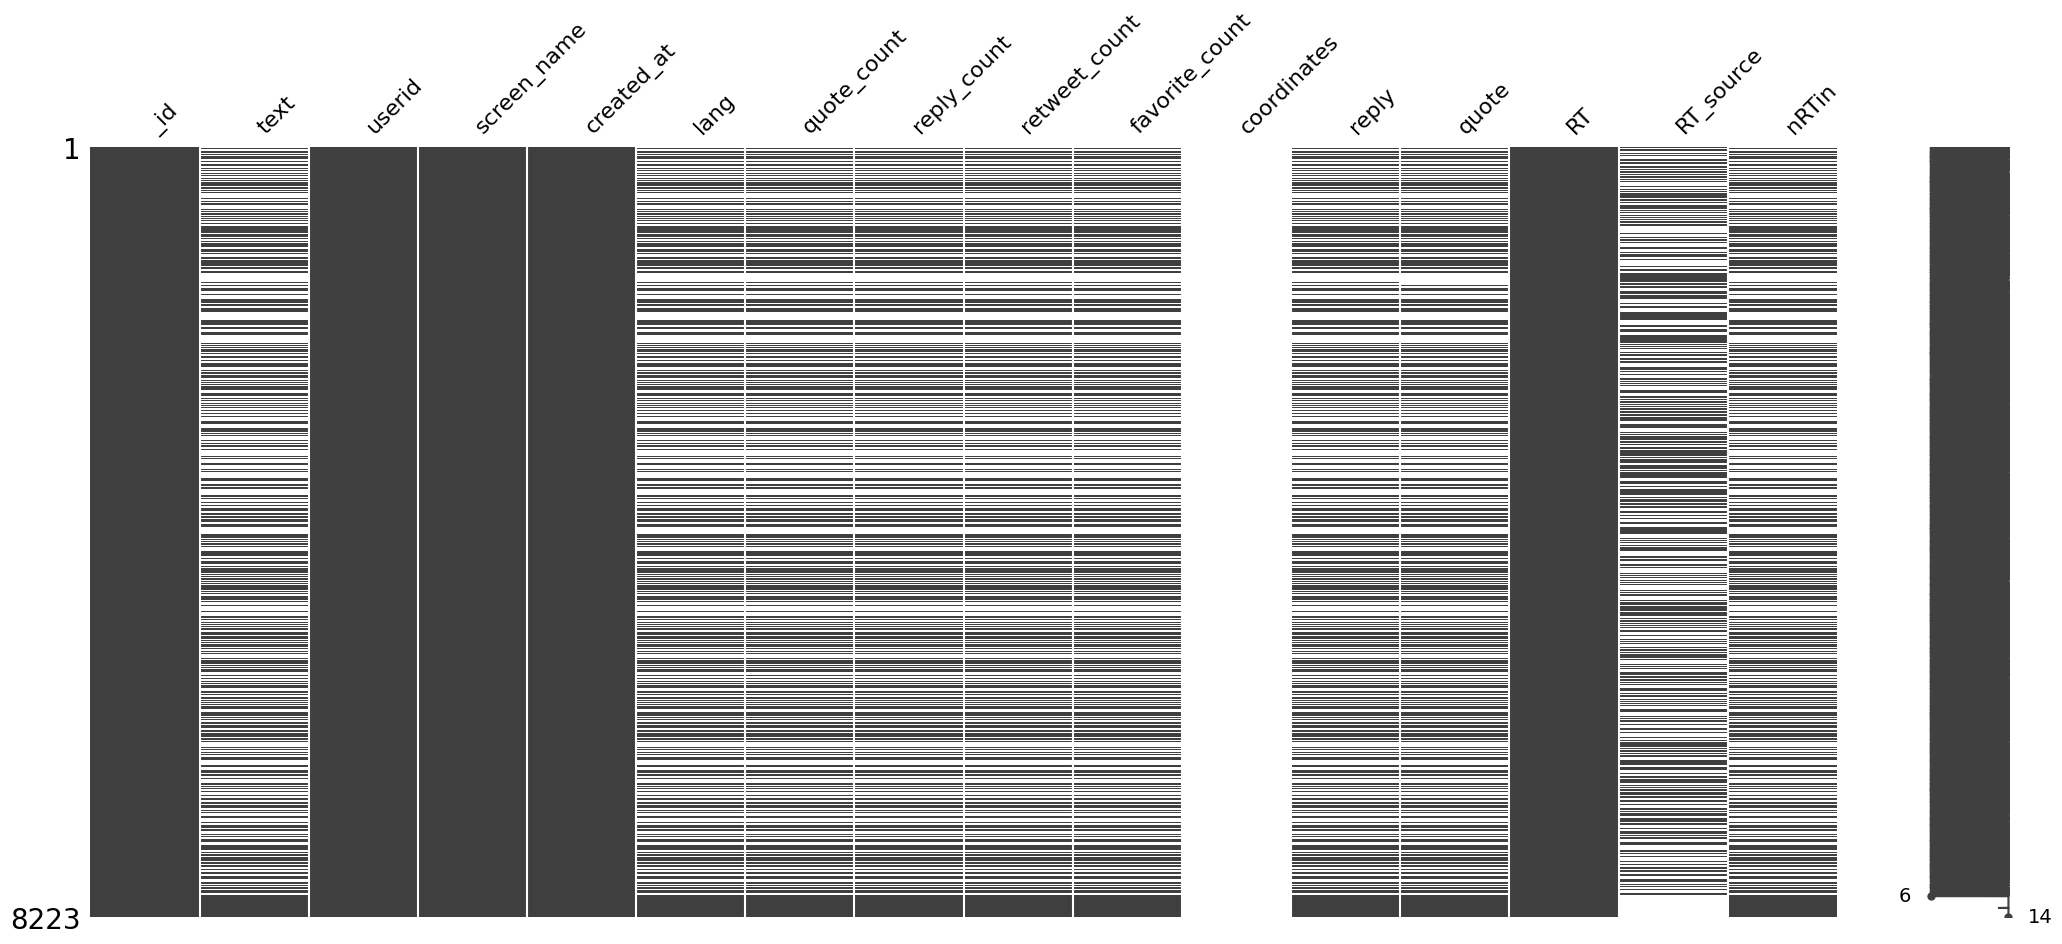

In [21]:
msno.matrix(df)

En este gráfico los nulos aparecen como líneas blancas ¿llama algo la atención al comparar unas columnas con otras?

El método `heatmap` nos ayudará a relacionar columnas con nulos entre sí:

In [ ]:
msno.heatmap(df)

El valor 1 indica que los nulos suceden a la vez. ne la misma fila, y el -1 que lo hacen en filas contrarias

<a name="Eliminar-nulos"></a>
### Eliminar nulos

Por defecto, `dropna` borra las filas que tienen algún NaN

In [ ]:
df2 = df.dropna()
df2

Problema: hemos borrado el dataframe entero. Una alternativa más conservadora es borrar filas tienen todas sus columnas a  NaN

In [ ]:
df.dropna(how="all")

Ahora no hemos borrado ninguno!! todas las filas tienen algún componente no nulo

**Ejercicio 2** También se pueden borrar columnas añadiendo axis=1 para indicar que trabaje por columnas. Hacerlo:

También se pueden conservar solo las que tienen a partir un cierto número de valores distintos de 0

In [ ]:
df.dropna(thresh=7) # probar a poner 6

Finalmente, podemos indicar que borre solo las que tiene nulos en una cierta columna

In [ ]:
df.dropna(subset=['lang'])

**Comentario**  La eliminación de nulos puede ser complicada; quizás perdiendo información ya que al quitar los nulos quitamos también otros datos potencialmente valiosos. Es conveniente hacer un estudio detallado de dónde aparecen los nulos y qué efectos tienen las distintas medidas que pueden ser



*   Eliminarlos, hay que ver si por filas, por columnas o por ambas y en qué orden
*   Sustituirlo por un valor adecuado, por ejemplo la media de los valores o la interpolación mediante una función. **Nunca** sustituirlos por un valor mágico, que afectará a nuestros análisis




**Ejercicio 3**
Separar el dataframe df2 en dos, uno df_RT con los valores RT_source distinto de  null y otro df_original con  los valores RT_source a null

**Ejercicio 4**

---



¿Eliminarías alguna columna de alguno de los dos ficheros por tener nulos?

**Consejo** En ocasiones es mejor no eliminar a priori los nulos porque puede ser que hagamos distintos análisis con distintas columnas, en ese caso eliminaremos solo tras obtener el dataframe auxiliar conl as columnas necesarias, reduciendo la pérdida de información

<a name="Transformación-de-valores"></a>
### Tranformación de valores

Empezamos con un ejemplo de asignaturas y los créditos que representan

In [ ]:
data = {'nombre': ['A', 'B', 'C', 'D','E', 'F', 'G'],
        'creditos': [4,  6,  4.5, 6,  6, 4.5,  12]}
df = pd.DataFrame(data)
df

**Ejercicio 6** Suponiendo que un crédito son 10 horas lectivas, añadir una columna que 'horas' con los créditos multiplicados por 10

Un caso especial: reemplazar todos los valores concretos. Supongamos que todas las asignaturas de 12 créditos pasan a ser de 16. Podemos hacer

In [ ]:
df2 = df.replace(12, 16)
df2['horas'] = df2.creditos*10
df2

Supongamos ahora que queremos añadir una columna 'tipo' que vale 'optativa' para todas las asignaturas de 4.5 créditos o menos y 'troncal' para asignaturas de más de 4.5 créditos.

Lo primero será escribir una función que haga esta transformación:

In [23]:
def calcula_tipo(creditos):
    if creditos>4.5:
        r = 'troncal'
    else:
        r = 'optativa'
    return r

In [24]:
calcula_tipo(5)

'troncal'

Ahora la aplicamos a columna créditos con la función `map` que aplica una función a todos los elementos de una columna:

In [ ]:
df['tipo'] = df.creditos.map(calcula_tipo)
df

También se puede hacer directamente con una función lambda:

In [ ]:
df['tipo2'] = df.creditos.map(lambda x:'optativa' if x<=4.5 else 'troncal')
df

<a name="normalizacion"></a>
### Normalización y estandarización

Vamos a ver estas dos formas de ajustar los datos con un ejemplo


In [ ]:
import pandas as pd

fich = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/madrid/contmettraf.csv"
df = pd.read_csv(fich,parse_dates=["FECHAH"])
df.index = df["FECHAH"]
df

#### Normalización

Supongamos que queremos hacer una gráfica sencilla de NO y CO

Primero vamos a escribir código para obtener un dataframe `dfEne21` que solo tenga las filas de df que correspondan al mes 1 de 2021. Esto se puede hacer filtrando el mes y el año (se utiliza .dt. para indcar a pandas que es una fecha)

In [ ]:
filtro = (df.FECHAH.dt.month == 1) & (df.FECHAH.dt.year == 2021)
dfEne21 = df[filtro]
dfEne21


**Ejercicio 8** Escribir código para obtener un dataframe df2 a partir de `dfEne21` que solo tenga la columna "CO" y "NO". Eliminar  además de df2 todas las filas con algún nulo

Podemos hacer la gráfica así de fácil

In [ ]:
df2.iloc[100:300,:].plot()

¿Cuál es el problema? que está en escalas diferentes. y el CO apenas se ve. Vamos a *normalizar* las columnas con la fórmula

X_new = (X - X_min)/(X_max - X_min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

metodo = MinMaxScaler()
escalador = metodo.fit(df2)
escalados = escalador.transform(df2)
df3 = pd.DataFrame(escalados,columns=df2.columns)
df3

In [ ]:
df3.describe()

In [ ]:
df3.iloc[100:300,:].plot()

### Estandarización

Para algunos tests y comparaciones nos puede interesar que las distribuciones tengan media 0 y desviación típica 0. Esto se hace con la fórmula
X_new = (X - mean)/Std

In [ ]:
df[ ["TEMPERATURA","HUMEDAD RELATIVA"]].hist(bins=40)

In [ ]:
from sklearn.preprocessing import StandardScaler
df2 = df[["TEMPERATURA","HUMEDAD RELATIVA"]].dropna()
metodo = StandardScaler()
escalador = metodo.fit(df2)
escalados = escalador.transform(df2)
df3 = pd.DataFrame(escalados,columns=df2.columns)
df3.hist(bins=40)
